In [1]:
#Installation of stop-words

!pip install stop-words


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32910 sha256=9d13003ed36b34326c869cc06f6e65bd81ff83e220d0f757a53414cdf819dda0
  Stored in directory: /root/.cache/pip/wheels/eb/03/0d/3bd31c983789aeb0b4d5e2ca48590288d9db1586cf5f225062
Successfully built stop-words


In [2]:
#Required packages

from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

In [3]:
#Google Drive 

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#Path to the document

filepath='/content/gdrive/My Drive/HDP & BDP/ALL.txt'
f = open(filepath)
doc = f.read()

In [5]:
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

In [6]:
# compile sample documents into a list
doc_set = [doc]

# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]


In [7]:
#LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=20, id2word = dictionary, passes=20)

In [8]:
!pip install pyLDAvis==2.1.2
import pyLDAvis.gensim


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=68f438074e518af5426ea86b95649f49ea1e93e5c31ad2de6e4bf83af7ab73c4
  Stored in directory: /root/.cache/pip/wheels/31/8c/a0/24a443892f2134e691d59c8c6c35e19821e02f85e49871f8fd
Successfully built pyLDAvis


/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


In [9]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


PreparedData(topic_coordinates=              x             y  topics  cluster       Freq
topic                                                    
18    -0.314939 -2.935325e-07       1        1  99.928696
0     -0.182524  6.309207e-07       2        1   0.071048
1      0.027416  5.984416e-06       3        1   0.000014
17     0.030862  4.039329e-05       4        1   0.000014
16     0.025734 -6.371392e-05       5        1   0.000014
15     0.023239  1.609388e-05       6        1   0.000014
14     0.026018  2.962307e-05       7        1   0.000014
13     0.022829  5.909768e-05       8        1   0.000014
12     0.029195  1.580313e-05       9        1   0.000014
11     0.027585 -2.093087e-05      10        1   0.000014
10     0.028626  2.007908e-05      11        1   0.000014
9      0.032308  1.913485e-05      12        1   0.000014
8      0.022502  6.507554e-05      13        1   0.000014
7      0.025812 -5.377912e-05      14        1   0.000014
6      0.028981  2.834402e-05      15        1   0.000014
5      0.030118  2.204882e-05      16        1   0.000014
4      0.020470 -1.040850e-04      17        1   0.000014
3      0.031156  2.333620e-05      18        1   0.000014
2      0.033601 -1.112347e-04      19        1   0.000014
19     0.031011  8.392296e-06      20        1   0.000014, topic_info=        Term         Freq        Total Category  logprob  loglift
8862    will  7424.000000  7424.000000  Default  30.0000  30.0000
6149   peopl  5208.000000  5208.000000  Default  29.0000  29.0000
7024       s  4515.000000  4515.000000  Default  28.0000  28.0000
8339  turkey  2898.000000  2898.000000  Default  27.0000  27.0000
7120     say  3026.000000  3026.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
1666     can     0.000008  2302.085694  Topic20  -8.7239  -3.6952
2017    come     0.000008  1269.341574  Topic20  -8.7491  -3.1250
4925     law     0.000008  1119.012760  Topic20  -8.7547  -3.0046
777     also     0.000008  1236.580453  Topic20  -8.7623  -3.1121
8763    want     0.000008  1669.063623  Topic20  -8.7571  -3.4069

[1400 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
474       1  0.998629      80
600       1  0.999398  actual
720       1  0.999048     akp
720       2  0.000772     akp
777       1  0.999531    also
...     ...       ...     ...
8908      2  0.000981    work
8910      1  0.999121  worker
8910      2  0.001026  worker
8975      1  0.999781    year
8975      2  0.000710    year

[128 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 1, 2, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 20])

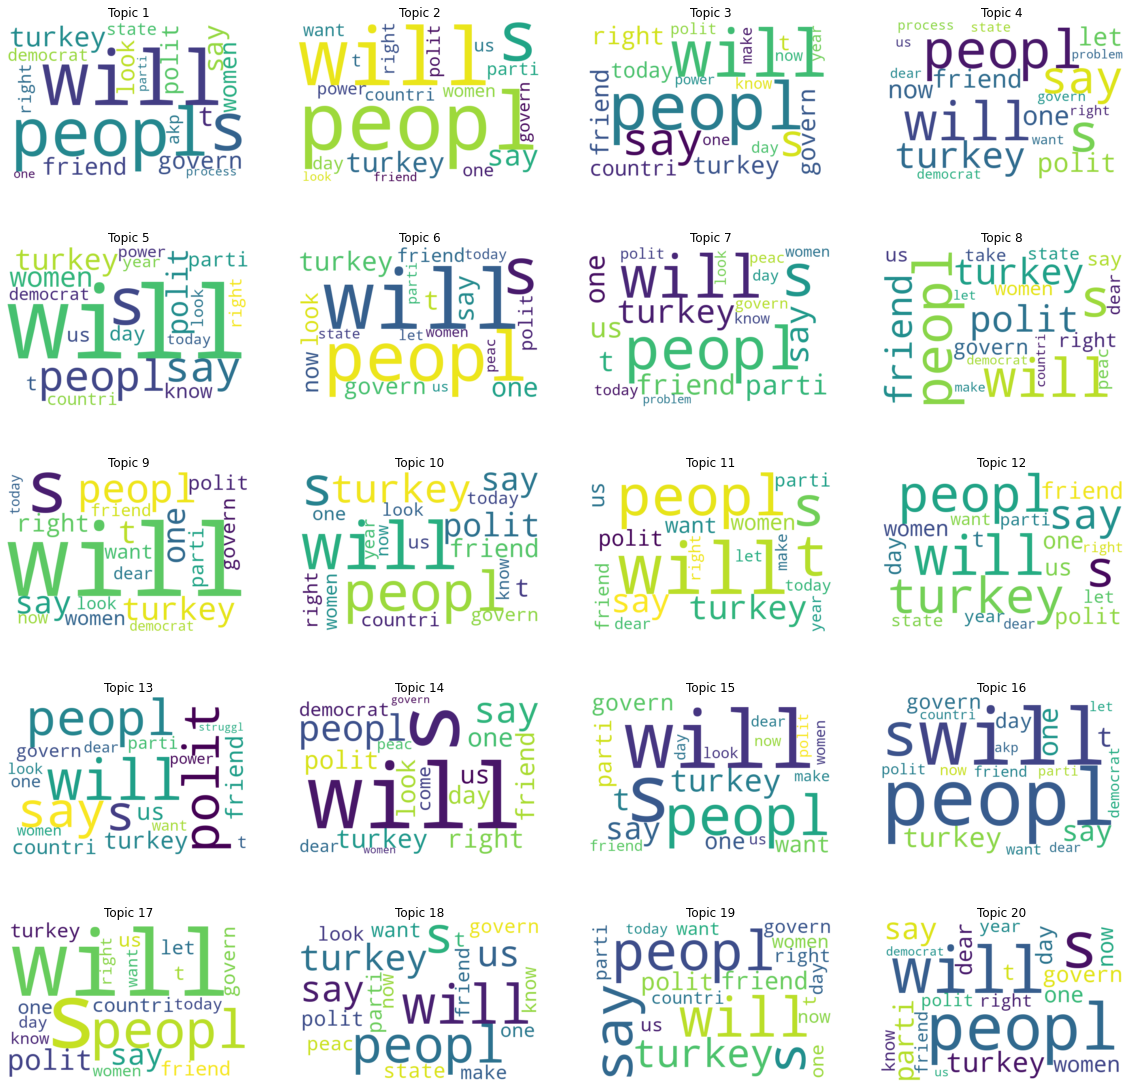

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of lists where each sublist contains the top 20 words for a topic
top_words = [[word for word, _ in ldamodel.show_topic(topic_id, topn=20)] for topic_id in range(ldamodel.num_topics)]

# Create a figure with subplots
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
axes = axes.ravel()

# Create a word cloud for each topic and display it in a subplot
for i, ax in enumerate(axes):
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(" ".join(top_words[i]))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title("Topic {}".format(i+1))
    ax.axis("off")

plt.show()